In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#加载csv文件
data = pd.read_csv('商品建筑销售价格年初至今平均住宅.csv')
#获取数据
data

,Unnamed: 0,商品建筑销售价格：年初至今平均：住宅
0,区域,中国
1,次国家,NaN
2,频率,月
3,单位,人民币/平方米
4,数据来源,国家统计局
...,...,...
343,06/2024,10288
344,07/2024,10305
345,08/2024,10317
346,09/2024,10246.98918147


In [20]:
x = [] #存放日期
y = [] #存放价格
start_row = 28 #开始行数
for index, row in data.iloc[start_row:].iterrows():
    x.append(index - start_row)
    y.append(float(row[1]))
len(y)

C:\Users\25337\AppData\Local\Temp\ipykernel_19004\582854386.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(float(row[1]))


320

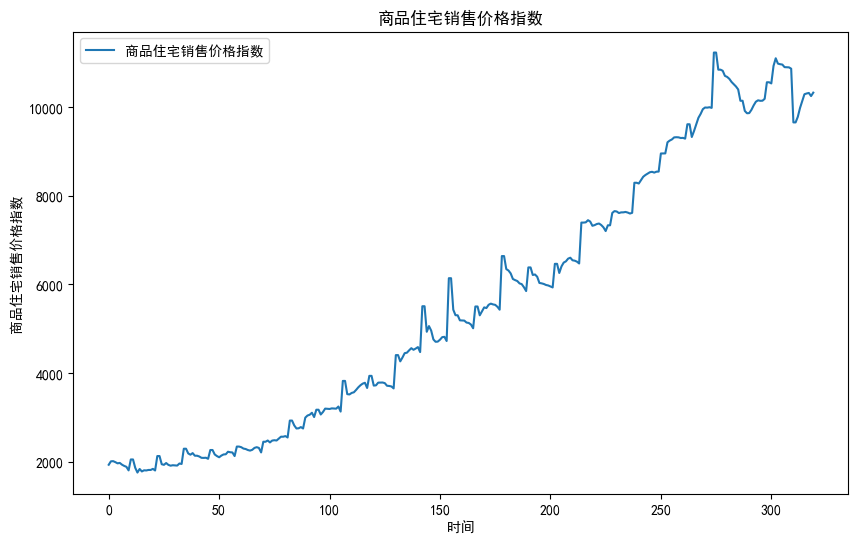

In [6]:
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
#创建画布
plt.figure(figsize=(10,6))
#plt.ylim(0, 1000)
#绘制折线图
plt.plot(x,y)
#设置标题
plt.title('商品住宅销售价格指数')
#设置x轴标签
plt.xlabel('时间')
#设置y轴标签
plt.ylabel('商品住宅销售价格指数')
#显示图例
plt.legend(['商品住宅销售价格指数'])
#显示图形
plt.show()

In [22]:
# 移动平均法函数定义
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'valid')

In [39]:
# 移动平均计算
window_size = 24
moving_avg = moving_average(y, window_size)
moving_avg.shape

(297,)

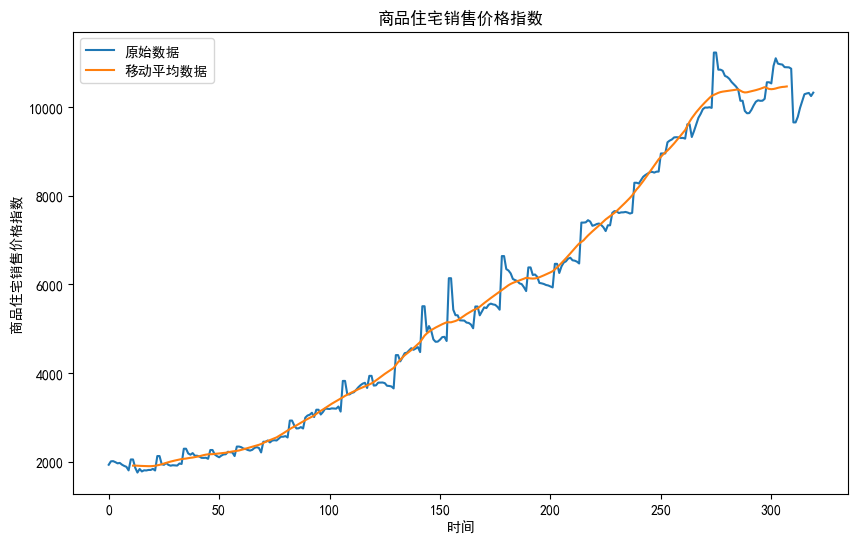

In [41]:
# 作图可视化
plt.figure(figsize=(10,6))
plt.plot(x, y, label='原始数据')
plt.plot(x[int(window_size/2)-1:len(x)-int(window_size/2)], moving_avg, label='移动平均数据')
plt.title('商品住宅销售价格指数')
plt.xlabel('时间')
plt.ylabel('商品住宅销售价格指数')
plt.legend()
plt.show()